# Minneapolis College Library Springshare Data Analysis
# A-Z Database Views
## William Vann
### 5/2023

In [1]:
# Import dependencies

from datetime import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
az_df_alltime = pd.read_csv("az_alltime.csv")
az_df_alltime

,Date,Views
0,2017-05,3
1,2017-06,566
2,2017-07,1951
3,2017-08,1216
4,2017-09,3517
...,...,...
68,2023-01,928
69,2023-02,1189
70,2023-03,982
71,2023-04,1063


In [3]:
# Remove first and last rows with minimal data

az_df_alltime = az_df_alltime.iloc[1:-1]
az_df_alltime = az_df_alltime.reset_index(drop=True)

az_df_alltime

,Date,Views
0,2017-06,566
1,2017-07,1951
2,2017-08,1216
3,2017-09,3517
4,2017-10,4075
...,...,...
66,2022-12,583
67,2023-01,928
68,2023-02,1189
69,2023-03,982


In [4]:
# Get basic info on this dataset

az_df_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    71 non-null     object
 1   Views   71 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [5]:
# Checking for null values in Views column

az_df_alltime["Views"].isna().sum()

0

In [6]:
# Summary stats for Total column

az_df_alltime["Views"].describe()

count      71.000000
mean     1739.774648
std      1071.826601
min       387.000000
25%       944.500000
50%      1450.000000
75%      2430.500000
max      4221.000000
Name: Views, dtype: float64

In [7]:
az_df_alltime["Date"] = pd.to_datetime(az_df_alltime["Date"])

In [8]:
az_df_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    71 non-null     datetime64[ns]
 1   Views   71 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [9]:
az_df_alltime

,Date,Views
0,2017-06-01,566
1,2017-07-01,1951
2,2017-08-01,1216
3,2017-09-01,3517
4,2017-10-01,4075
...,...,...
66,2022-12-01,583
67,2023-01-01,928
68,2023-02-01,1189
69,2023-03-01,982


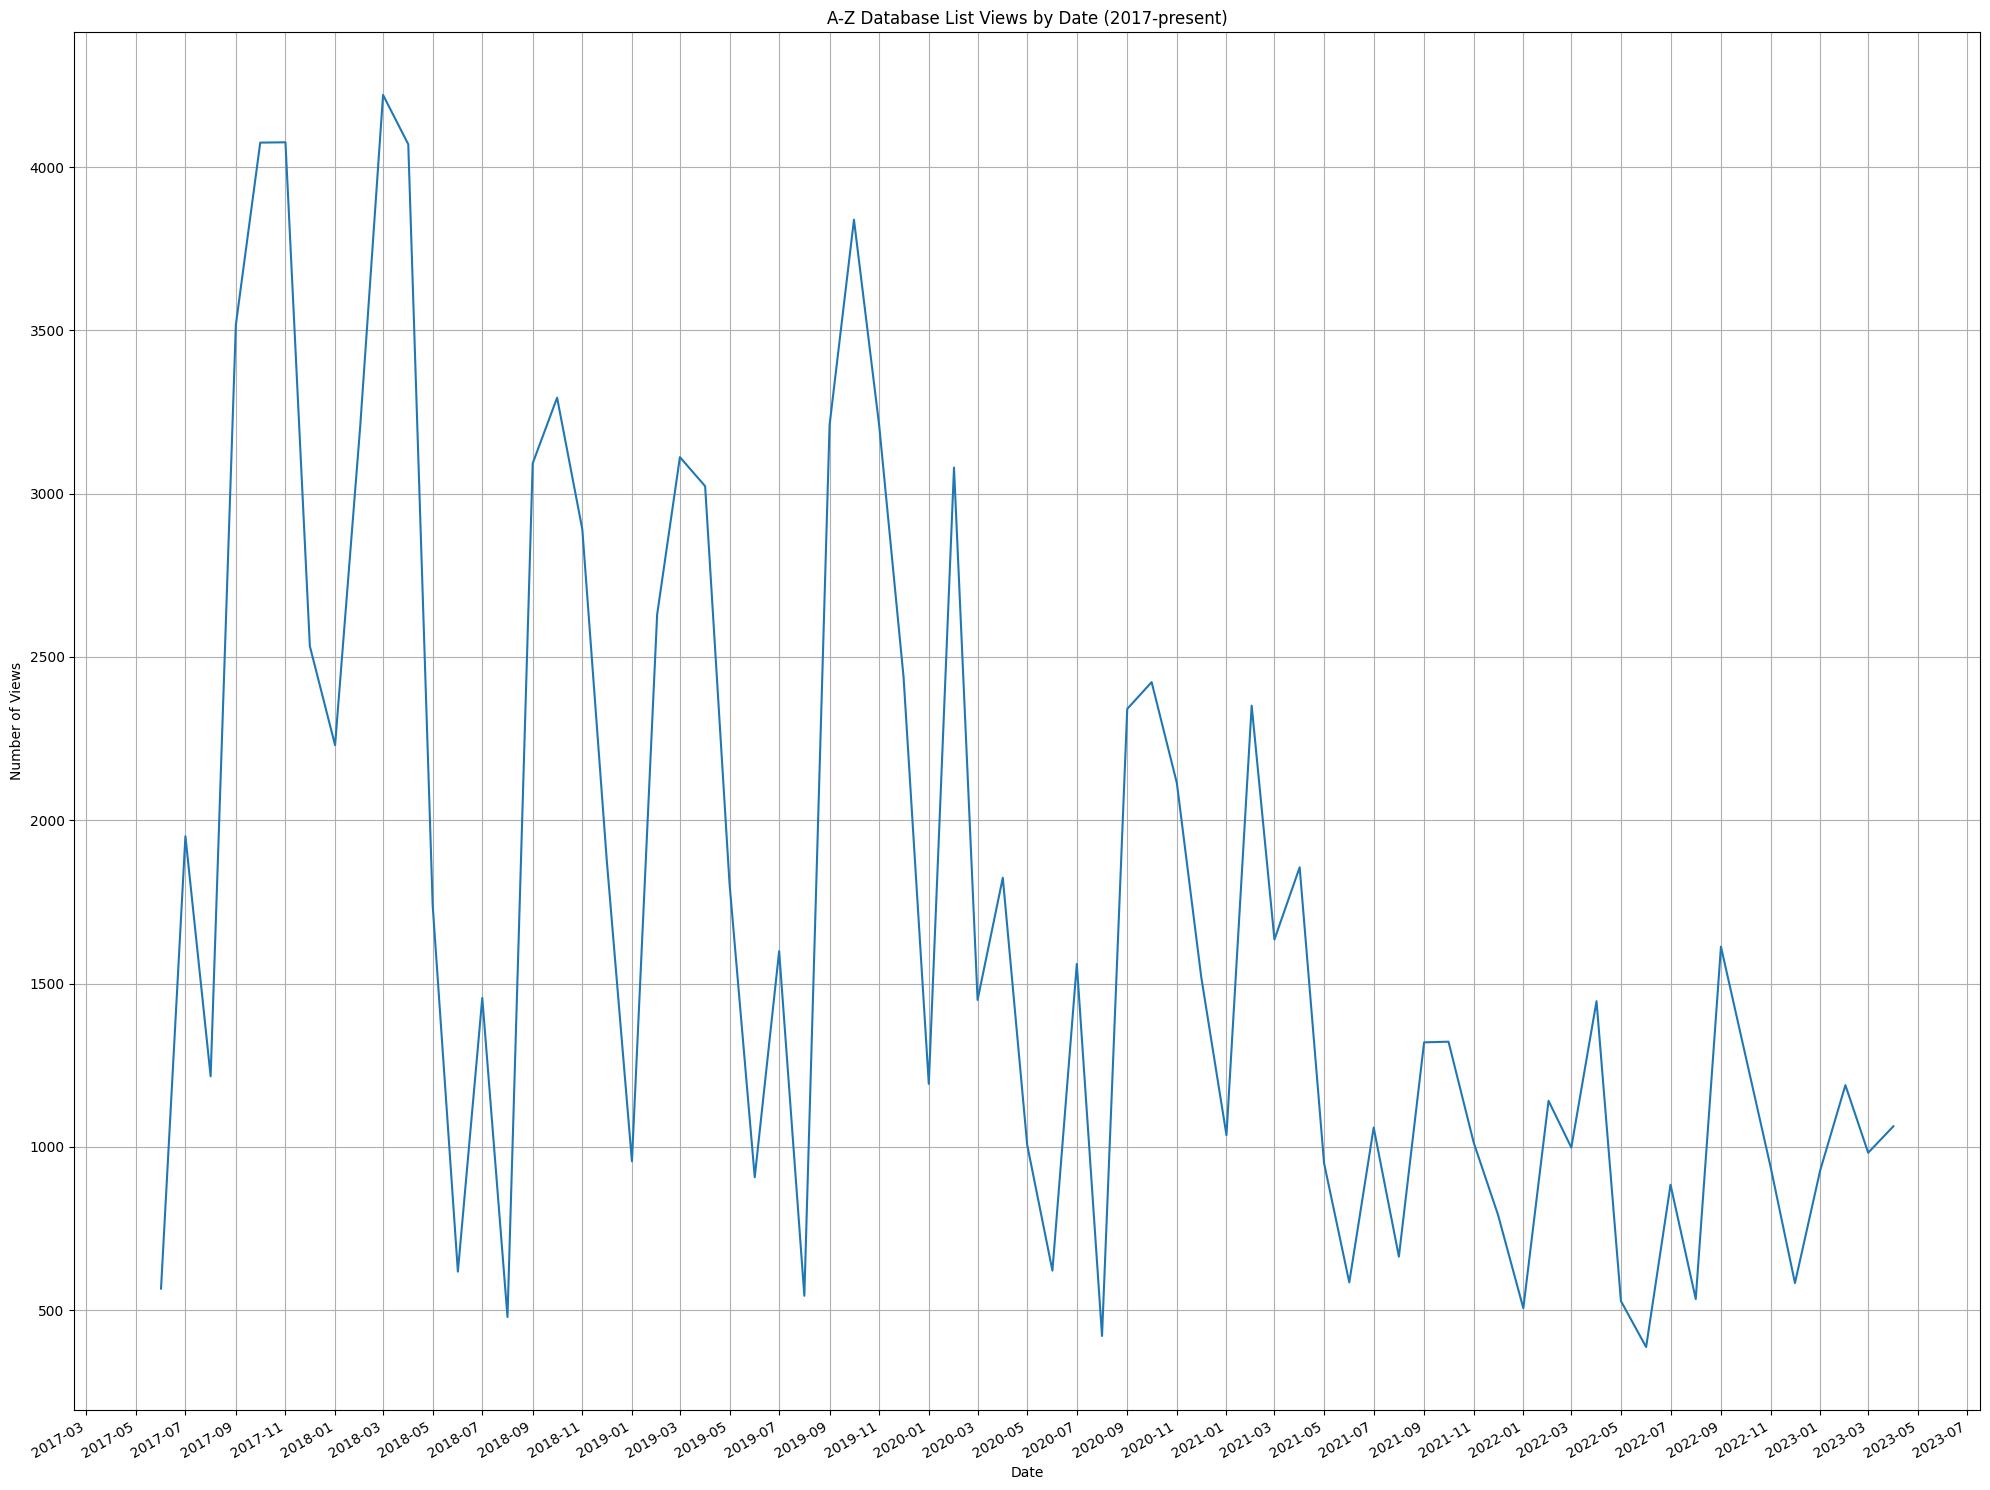

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.set_title("A-Z Database List Views by Date (2017-present)")
ax.grid(True)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Views")

month_locator = mdates.MonthLocator(interval=2)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

# Same as above
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(az_df_alltime["Date"], az_df_alltime["Views"])

fig.autofmt_xdate()
plt.tight_layout()

fig.savefig("AtoZ/a_z_views.png")

# Analysis by Terms

In [11]:
az_df_summer_terms = az_df_alltime.loc[(az_df_alltime["Date"].dt.month == 5) | 
                                       (az_df_alltime["Date"].dt.month == 6) |
                                       (az_df_alltime["Date"].dt.month == 7), :]
az_df_summer_terms = az_df_summer_terms.reset_index(drop=True)

az_df_summer_terms["Formatted_Date"] = az_df_summer_terms["Date"].dt.strftime("%m-%Y")

az_df_summer_terms

,Date,Views,Formatted_Date
0,2017-06-01,566,06-2017
1,2017-07-01,1951,07-2017
2,2018-05-01,1740,05-2018
3,2018-06-01,618,06-2018
4,2018-07-01,1456,07-2018
5,2019-05-01,1806,05-2019
6,2019-06-01,907,06-2019
7,2019-07-01,1599,07-2019
8,2020-05-01,1006,05-2020
9,2020-06-01,621,06-2020


In [12]:
az_df_fall_terms = az_df_alltime.loc[(az_df_alltime["Date"].dt.month == 8) | 
                                       (az_df_alltime["Date"].dt.month == 9) |
                                       (az_df_alltime["Date"].dt.month == 10) |
                                       (az_df_alltime["Date"].dt.month == 11) |
                                       (az_df_alltime["Date"].dt.month == 12), :]
az_df_fall_terms = az_df_fall_terms.reset_index(drop=True)

az_df_fall_terms["Formatted_Date"] = az_df_fall_terms["Date"].dt.strftime("%m-%Y")

az_df_fall_terms

,Date,Views,Formatted_Date
0,2017-08-01,1216,08-2017
1,2017-09-01,3517,09-2017
2,2017-10-01,4075,10-2017
3,2017-11-01,4076,11-2017
4,2017-12-01,2533,12-2017
5,2018-08-01,479,08-2018
6,2018-09-01,3093,09-2018
7,2018-10-01,3294,10-2018
8,2018-11-01,2891,11-2018
9,2018-12-01,1879,12-2018


In [13]:
az_df_spring_terms = az_df_alltime.loc[(az_df_alltime["Date"].dt.month == 1) | 
                                       (az_df_alltime["Date"].dt.month == 2) |
                                       (az_df_alltime["Date"].dt.month == 3) |
                                       (az_df_alltime["Date"].dt.month == 4), :]
az_df_spring_terms = az_df_spring_terms.reset_index(drop=True)

az_df_spring_terms["Formatted_Date"] = az_df_spring_terms["Date"].dt.strftime("%m-%Y")

az_df_spring_terms

,Date,Views,Formatted_Date
0,2018-01-01,2230,01-2018
1,2018-02-01,3209,02-2018
2,2018-03-01,4221,03-2018
3,2018-04-01,4070,04-2018
4,2019-01-01,956,01-2019
5,2019-02-01,2630,02-2019
6,2019-03-01,3112,03-2019
7,2019-04-01,3023,04-2019
8,2020-01-01,1193,01-2020
9,2020-02-01,3080,02-2020


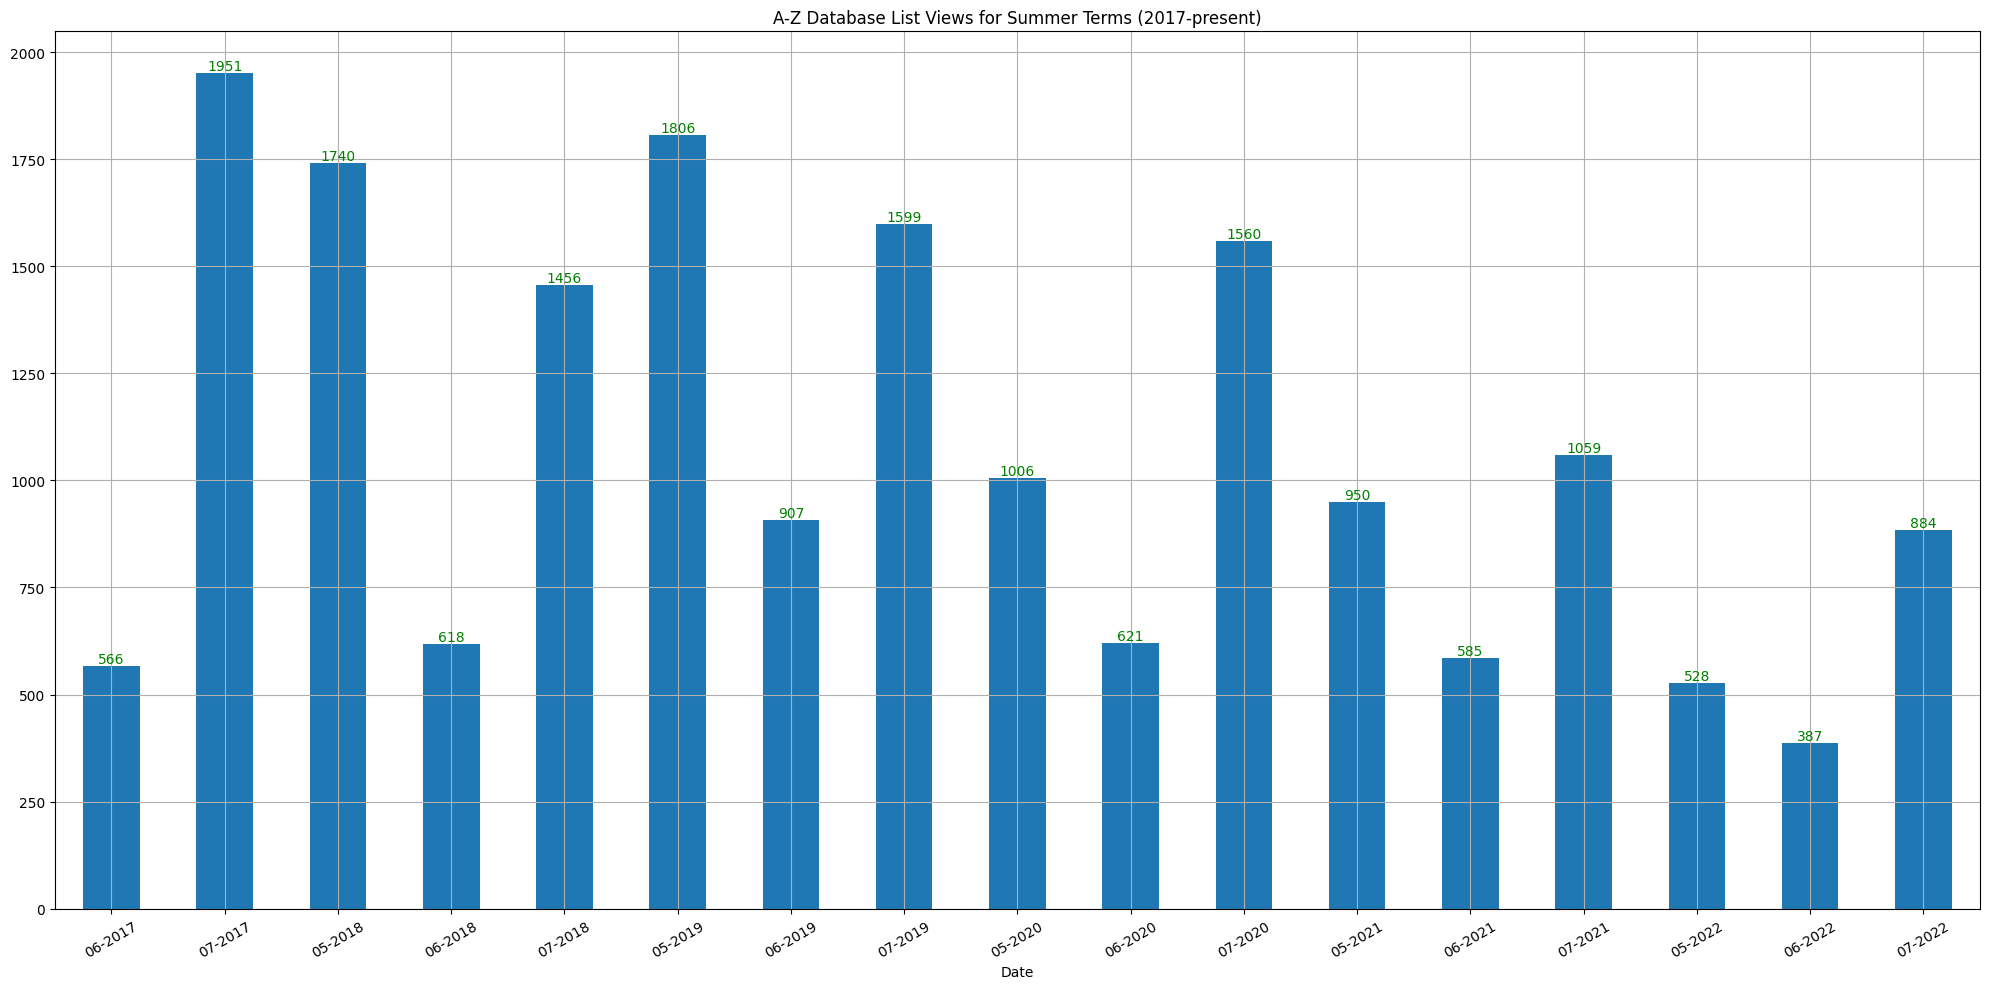

In [14]:
ax = az_df_summer_terms.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Summer Terms (2017-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/a_z_summers.png")

plt.show()

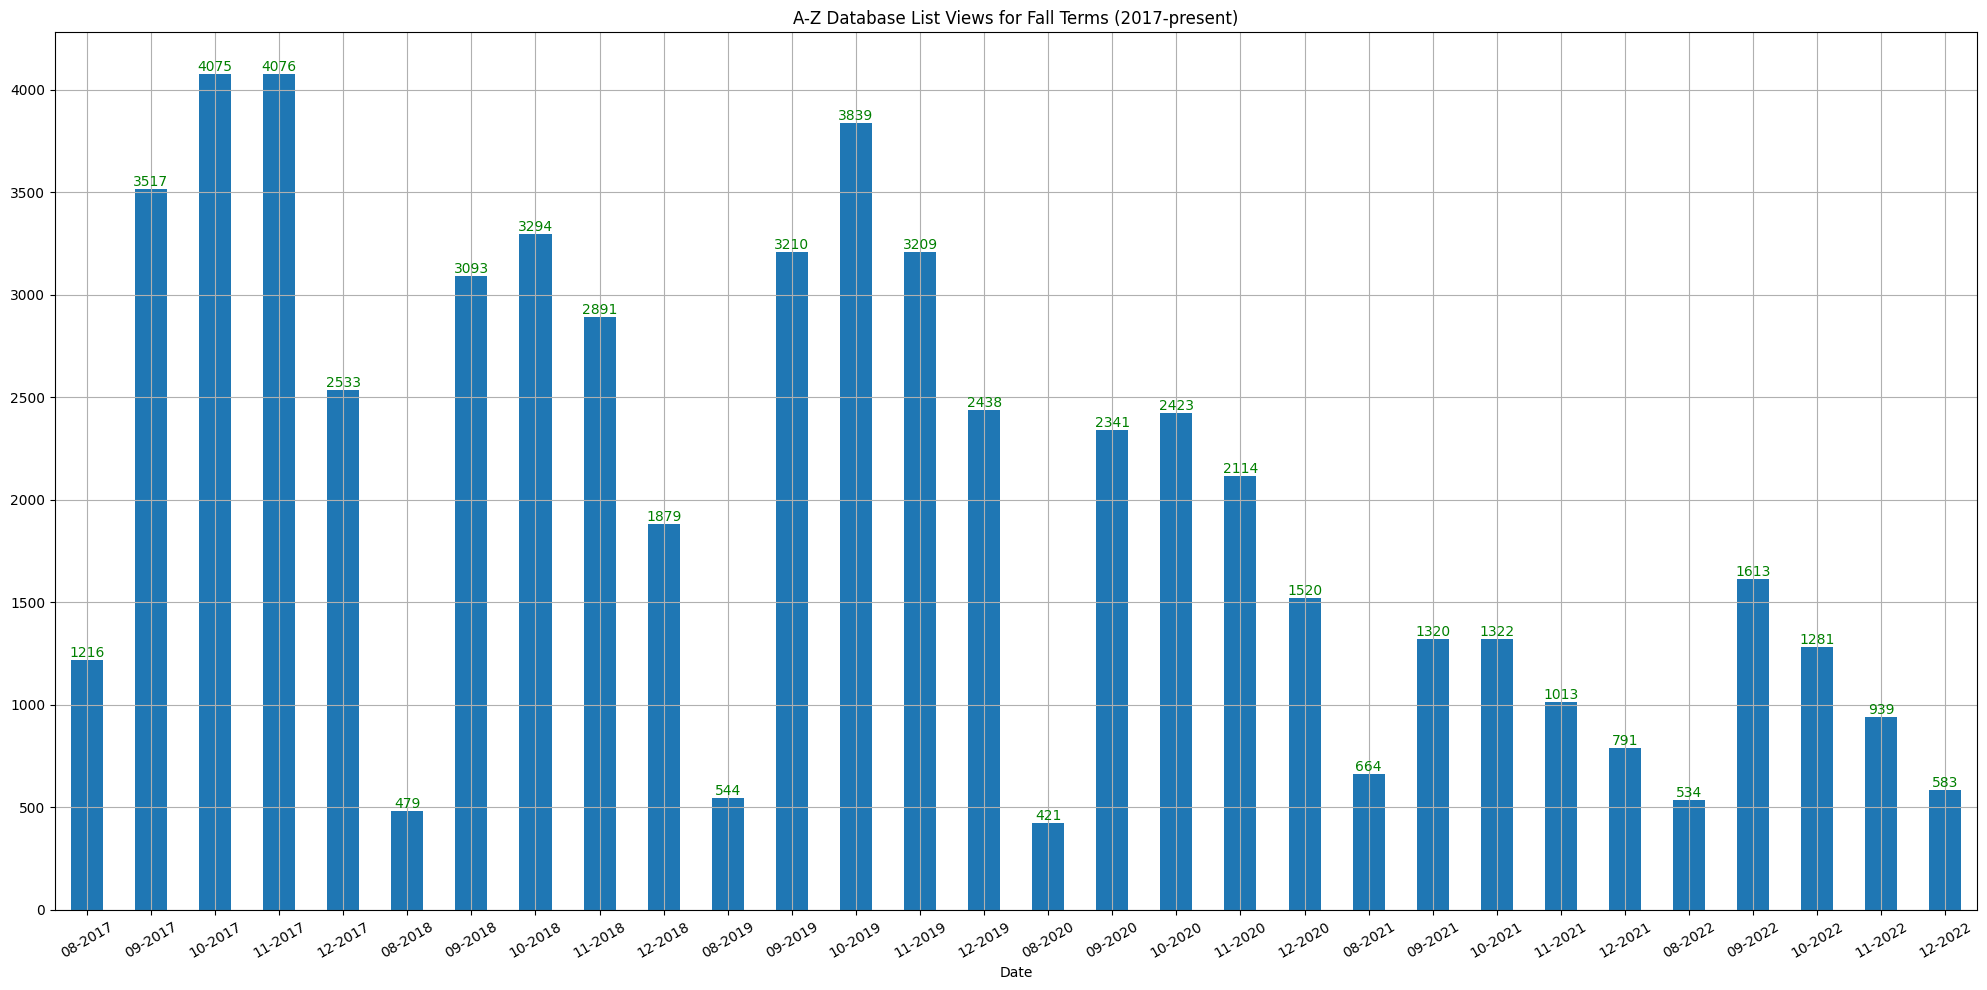

In [15]:
ax = az_df_fall_terms.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Fall Terms (2017-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/a_z_fall.png")

plt.show()

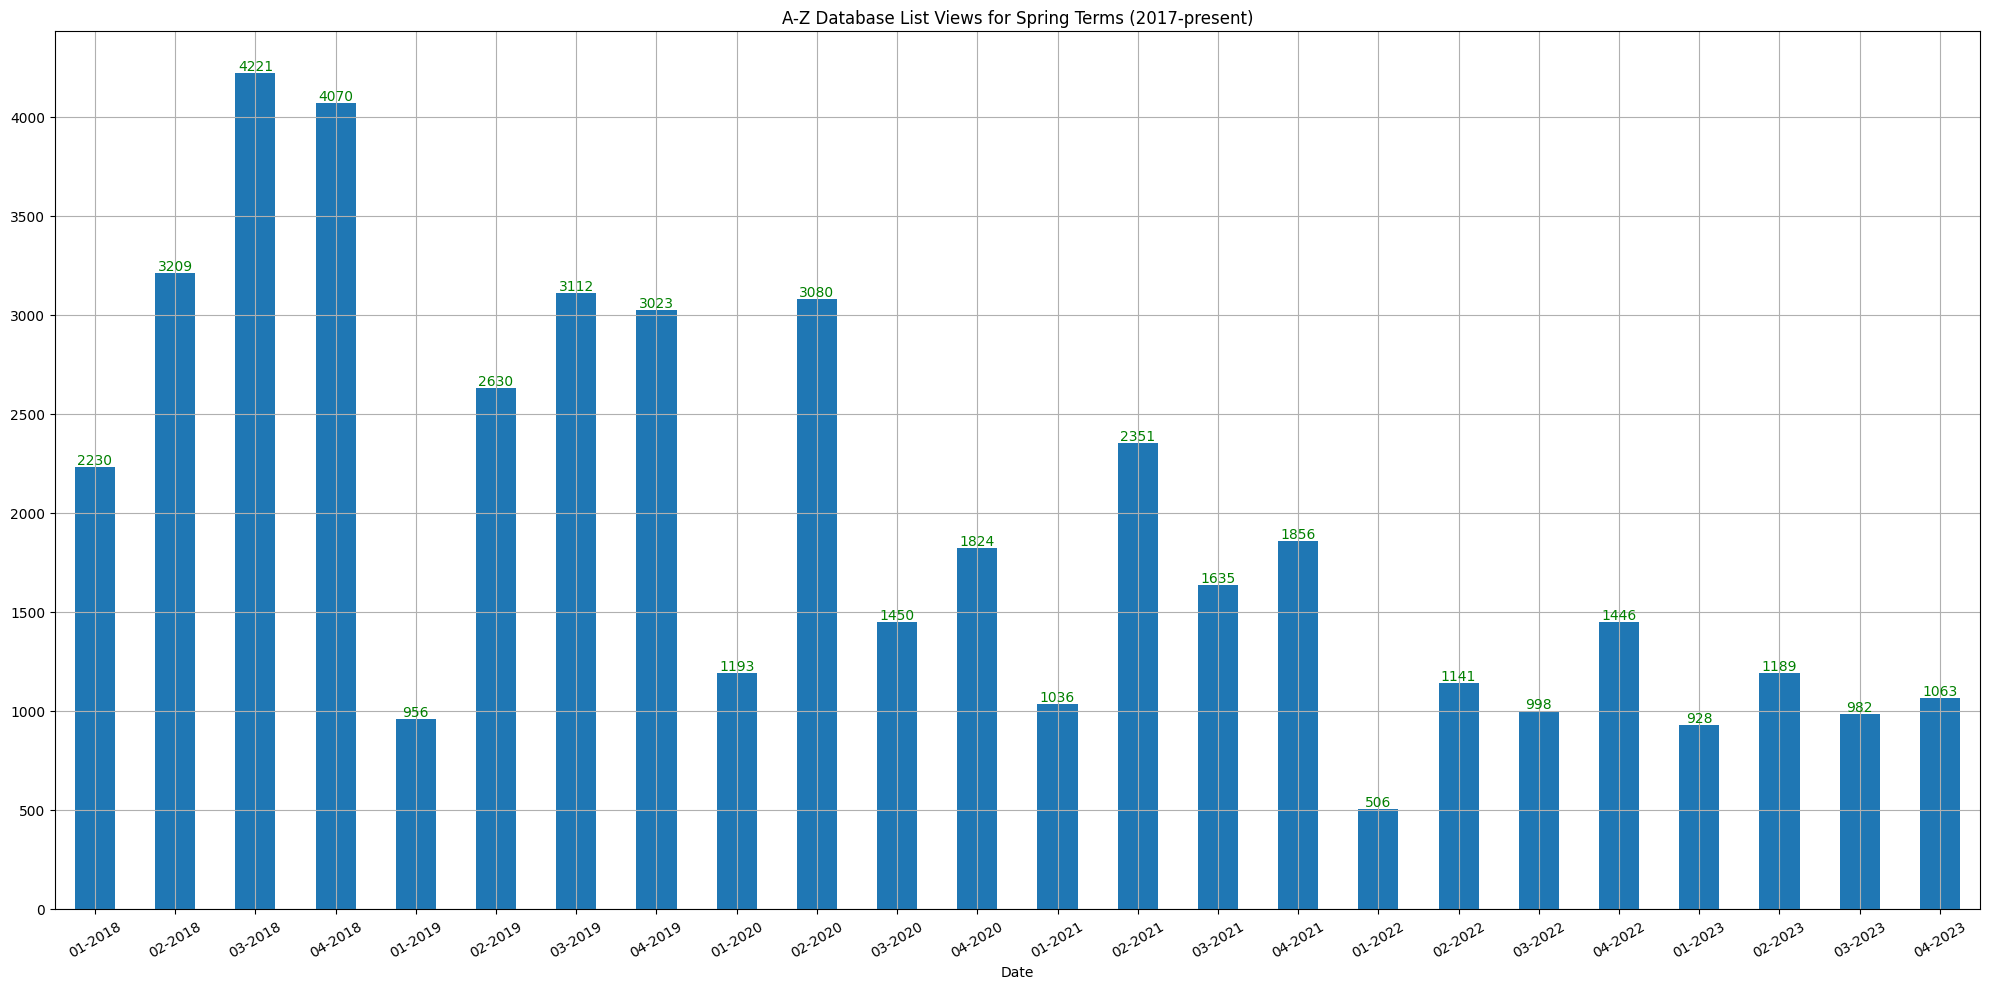

In [16]:
ax = az_df_spring_terms.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Spring Terms (2017-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/a_z_spring.png")

plt.show()

In [17]:
az_df_summer_bymonth = az_df_summer_terms.sort_values(by="Formatted_Date")
az_df_summer_bymonth

mays = az_df_summer_bymonth.loc[ (az_df_summer_bymonth["Formatted_Date"].str.startswith("05")), ["Formatted_Date", "Views"]]
junes = az_df_summer_bymonth.loc[ (az_df_summer_bymonth["Formatted_Date"].str.startswith("06")), ["Formatted_Date", "Views"]]
julys = az_df_summer_bymonth.loc[ (az_df_summer_bymonth["Formatted_Date"].str.startswith("07")), ["Formatted_Date", "Views"]]

In [18]:
az_df_fall_bymonth = az_df_fall_terms.sort_values(by="Formatted_Date")
az_df_fall_bymonth = az_df_fall_bymonth.reset_index(drop=True)
az_df_fall_bymonth

augusts = az_df_fall_bymonth.loc[ (az_df_fall_bymonth["Formatted_Date"].str.startswith("08")), ["Formatted_Date", "Views"]]
septembers = az_df_fall_bymonth.loc[ (az_df_fall_bymonth["Formatted_Date"].str.startswith("09")), ["Formatted_Date", "Views"]]
octobers = az_df_fall_bymonth.loc[ (az_df_fall_bymonth["Formatted_Date"].str.startswith("10")), ["Formatted_Date", "Views"]]
novembers = az_df_fall_bymonth.loc[ (az_df_fall_bymonth["Formatted_Date"].str.startswith("11")), ["Formatted_Date", "Views"]]
decembers = az_df_fall_bymonth.loc[ (az_df_fall_bymonth["Formatted_Date"].str.startswith("12")), ["Formatted_Date", "Views"]]

In [19]:
az_df_spring_bymonth = az_df_spring_terms.sort_values(by="Formatted_Date")
az_df_spring_bymonth = az_df_spring_bymonth.reset_index(drop=True)
az_df_spring_bymonth

januarys = az_df_spring_bymonth.loc[ (az_df_spring_bymonth["Formatted_Date"].str.startswith("01")), ["Formatted_Date", "Views"]]
februarys = az_df_spring_bymonth.loc[ (az_df_spring_bymonth["Formatted_Date"].str.startswith("02")), ["Formatted_Date", "Views"]]
marchs = az_df_spring_bymonth.loc[ (az_df_spring_bymonth["Formatted_Date"].str.startswith("03")), ["Formatted_Date", "Views"]]
aprils = az_df_spring_bymonth.loc[ (az_df_spring_bymonth["Formatted_Date"].str.startswith("04")), ["Formatted_Date", "Views"]]

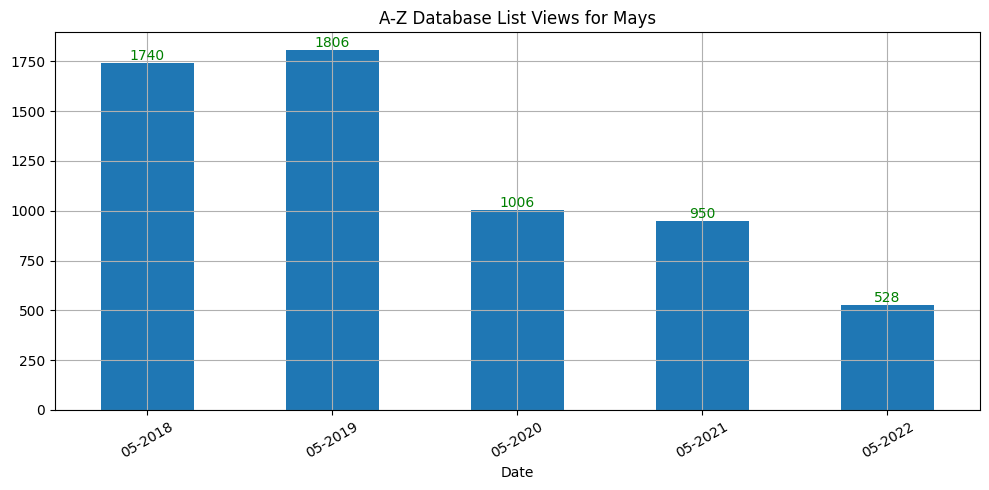

In [20]:
ax5 = mays.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Mays"        
)

ax5.bar_label(ax5.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/mays.png")

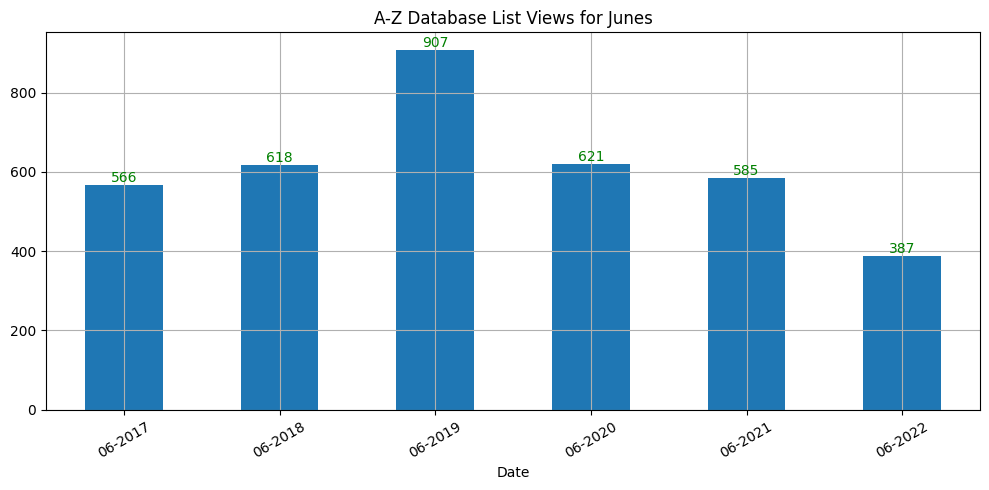

In [21]:
ax6 = junes.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Junes")

ax6.bar_label(ax6.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/junes.png")

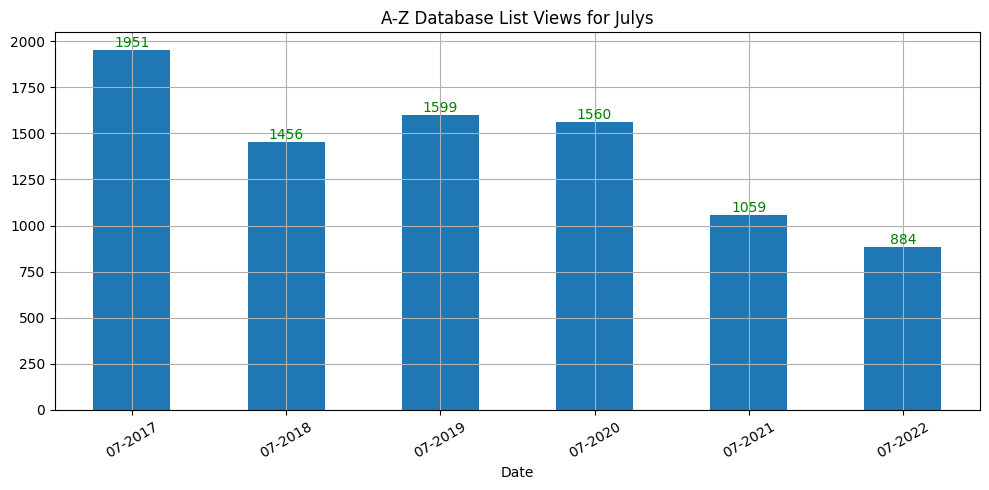

In [22]:
ax7 = julys.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Julys")

ax7.bar_label(ax7.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/julys.png")

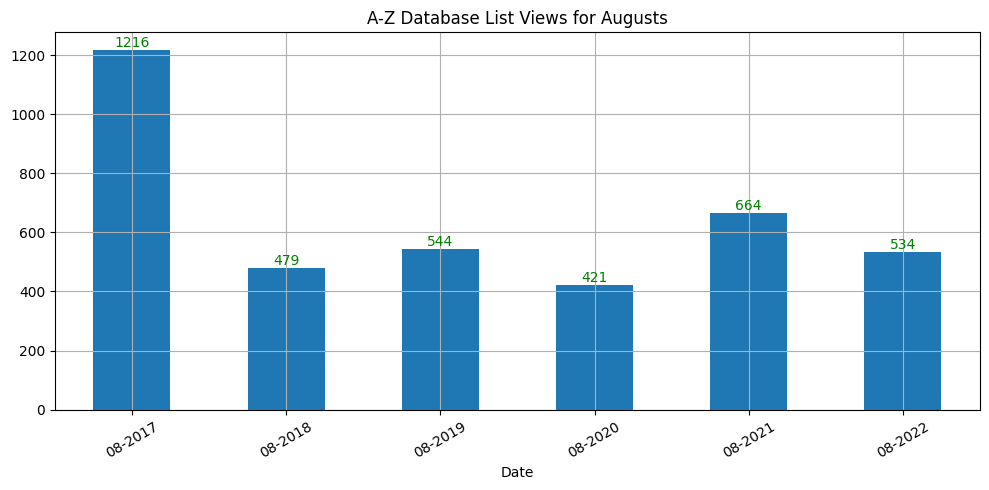

In [23]:
ax8 = augusts.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Augusts"        
)

ax8.bar_label(ax8.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/augusts.png")

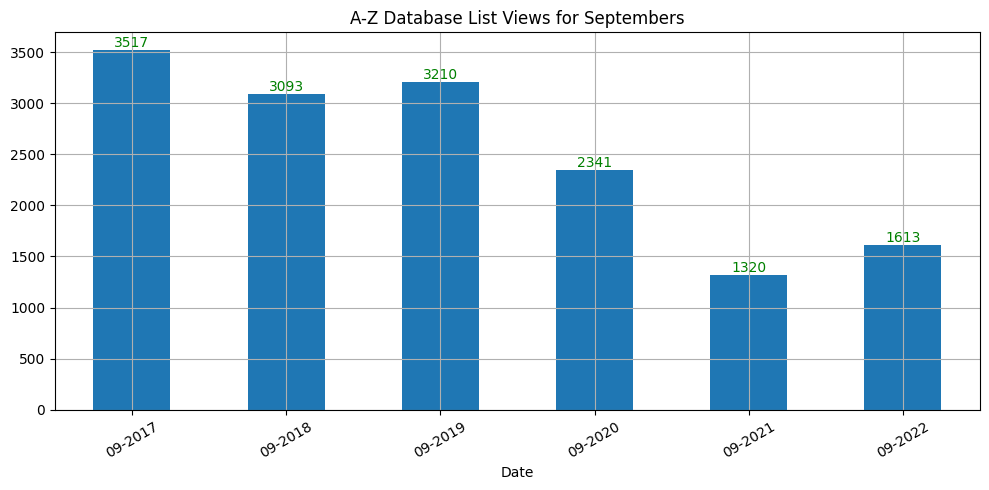

In [24]:
ax9 = septembers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Septembers"        
)

ax9.bar_label(ax9.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/septembers.png")

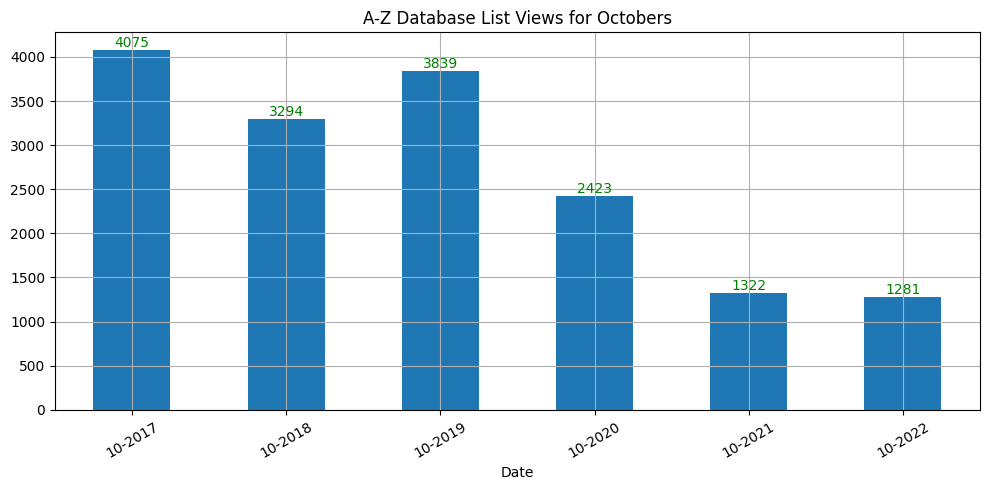

In [25]:
ax10 = octobers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Octobers"        
)

ax10.bar_label(ax10.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/octobers.png")

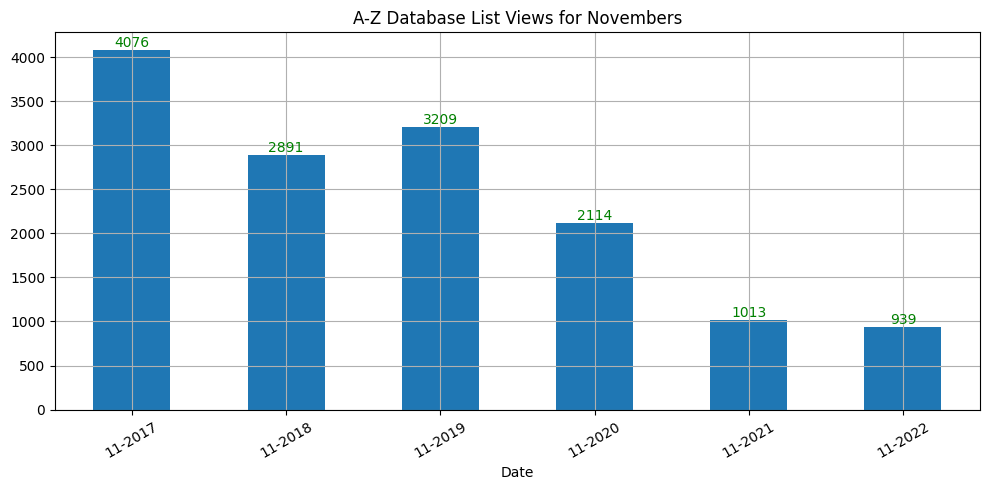

In [26]:
ax11 = novembers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Novembers"        
)

ax11.bar_label(ax11.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/novembers.png")

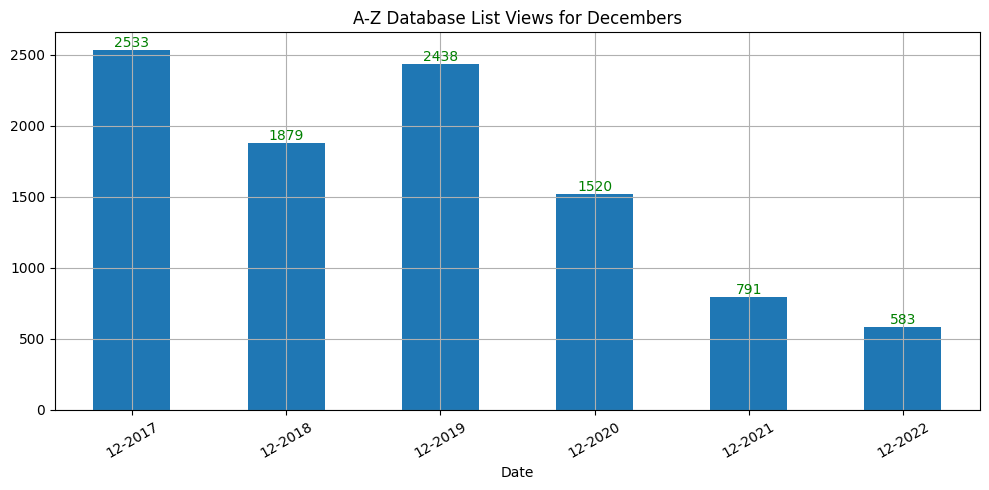

In [27]:
ax12 = decembers.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Decembers"        
)

ax12.bar_label(ax12.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/decembers.png")

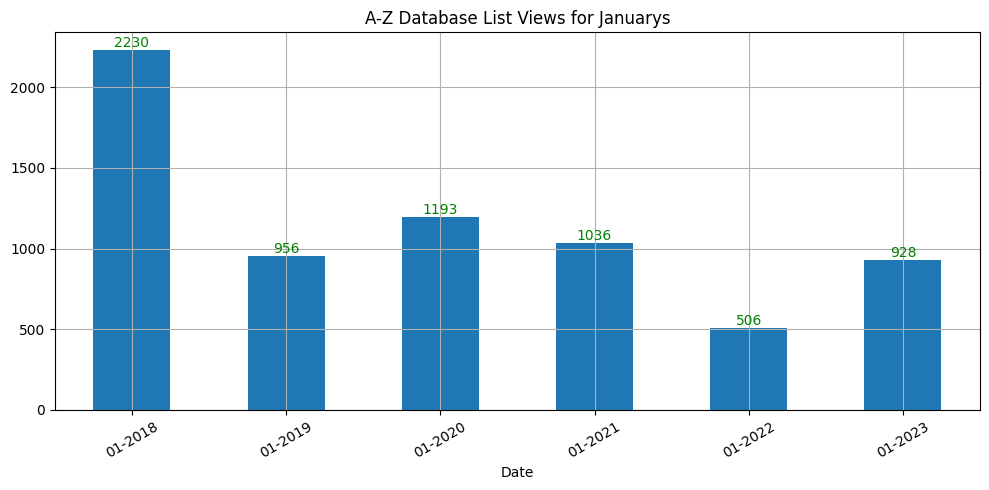

In [28]:
ax1 = januarys.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Januarys"        
)

ax1.bar_label(ax1.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/januarys.png")

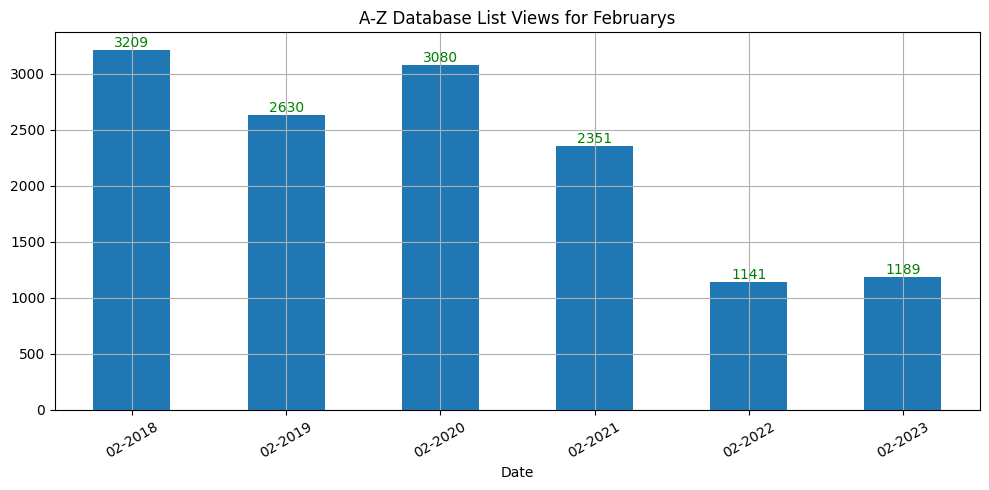

In [29]:
ax2 = februarys.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Februarys"        
)

ax2.bar_label(ax2.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/februarys.png")

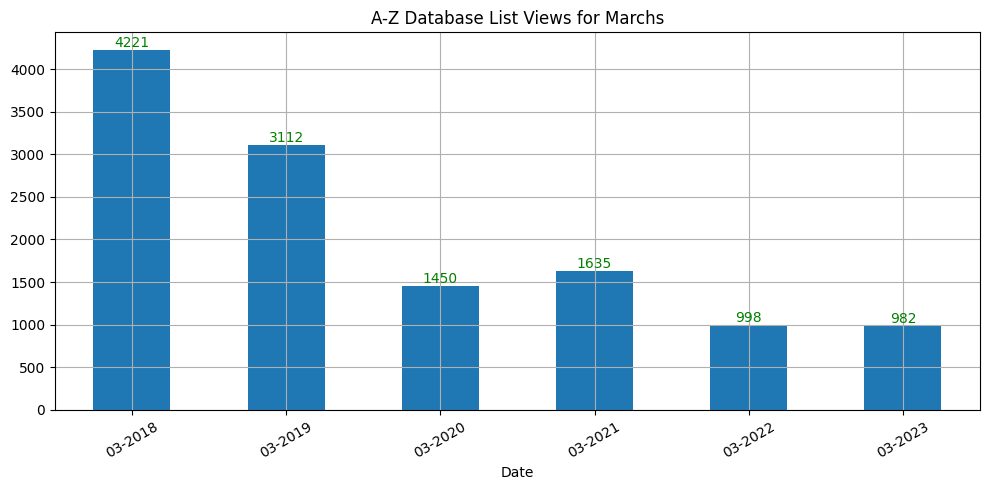

In [30]:
ax3= marchs.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Marchs"        
)

ax3.bar_label(ax3.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/marchs.png")

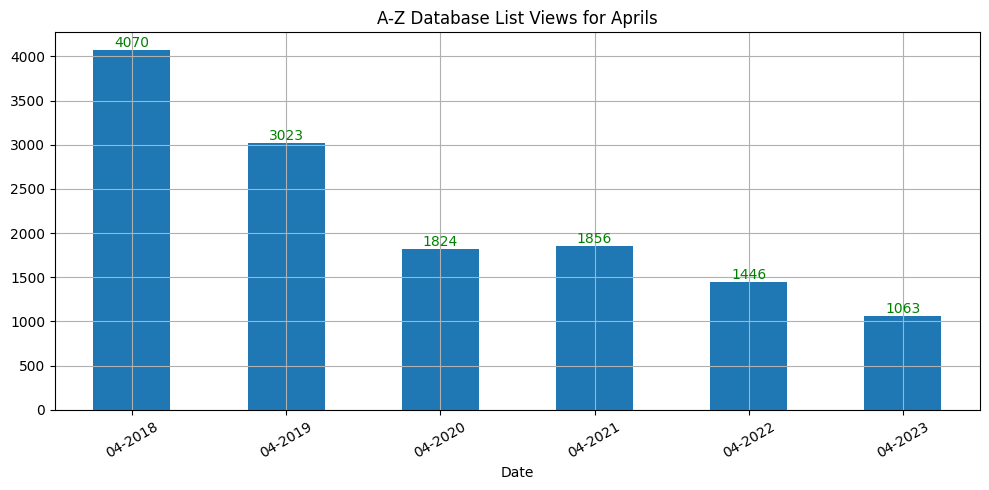

In [31]:
ax4 = aprils.plot(
        x="Formatted_Date", 
        y="Views", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"A-Z Database List Views for Aprils"        
)

ax4.bar_label(ax4.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/aprils.png")

# Inferences

In [32]:
az_df_summer_bymonth["Month"] = az_df_summer_bymonth["Formatted_Date"].apply(lambda x: x[:2])
az_df_summer_bymonth = az_df_summer_bymonth.reset_index(drop=True)

az_df_summer_bymonth

,Date,Views,Formatted_Date,Month
0,2018-05-01,1740,05-2018,05
1,2019-05-01,1806,05-2019,05
2,2020-05-01,1006,05-2020,05
3,2021-05-01,950,05-2021,05
4,2022-05-01,528,05-2022,05
5,2017-06-01,566,06-2017,06
6,2018-06-01,618,06-2018,06
7,2019-06-01,907,06-2019,06
8,2020-06-01,621,06-2020,06
9,2021-06-01,585,06-2021,06


In [33]:
maxs = az_df_summer_bymonth.groupby(["Month"])["Views"].max()
maxs.name = "Max"
maxs

Month
05    1806
06     907
07    1951
Name: Max, dtype: int64

In [34]:
mins = az_df_summer_bymonth.groupby(["Month"])["Views"].min()
mins.name = "Min"
mins

Month
05    528
06    387
07    884
Name: Min, dtype: int64

In [35]:
last = az_df_summer_bymonth.loc[ (az_df_summer_bymonth["Formatted_Date"].str.endswith("2022"))   , "Views"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
05    528
06    387
07    884
Name: Last, dtype: int64

In [36]:
summer_df = pd.concat([maxs, mins, last], axis=1)
summer_df

,Max,Min,Last
Month,,,
05,1806,528,528
06,907,387,387
07,1951,884,884


In [37]:
summer_df["Max_to_Last_%Change"] = round((summer_df["Last"] - summer_df["Max"]) / summer_df["Max"] * 100, 2)
summer_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
05,1806,528,528,-70.76
06,907,387,387,-57.33
07,1951,884,884,-54.69


In [38]:
summer_df["Max_to_Min_%Change"] = round((summer_df["Min"] - summer_df["Max"]) / summer_df["Max"] * 100, 2)
summer_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
05,1806,528,528,-70.76,-70.76
06,907,387,387,-57.33,-57.33
07,1951,884,884,-54.69,-54.69


In [39]:
az_df_fall_bymonth["Month"] = az_df_fall_bymonth["Formatted_Date"].apply(lambda x: x[:2])

az_df_fall_bymonth

,Date,Views,Formatted_Date,Month
0,2017-08-01,1216,08-2017,08
1,2018-08-01,479,08-2018,08
2,2019-08-01,544,08-2019,08
3,2020-08-01,421,08-2020,08
4,2021-08-01,664,08-2021,08
5,2022-08-01,534,08-2022,08
6,2017-09-01,3517,09-2017,09
7,2018-09-01,3093,09-2018,09
8,2019-09-01,3210,09-2019,09
9,2020-09-01,2341,09-2020,09


In [40]:
maxs = az_df_fall_bymonth.groupby(["Month"])["Views"].max()
maxs.name = "Max"
maxs

Month
08    1216
09    3517
10    4075
11    4076
12    2533
Name: Max, dtype: int64

In [41]:
mins = az_df_fall_bymonth.groupby(["Month"])["Views"].min()
mins.name = "Min"
mins

Month
08     421
09    1320
10    1281
11     939
12     583
Name: Min, dtype: int64

In [42]:
last = az_df_fall_bymonth.loc[ (az_df_fall_bymonth["Formatted_Date"].str.endswith("2022"))   , "Views"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
08     534
09    1613
10    1281
11     939
12     583
Name: Last, dtype: int64

In [43]:
fall_df = pd.concat([maxs, mins, last], axis=1)
fall_df

,Max,Min,Last
Month,,,
08,1216,421,534
09,3517,1320,1613
10,4075,1281,1281
11,4076,939,939
12,2533,583,583


In [44]:
fall_df["Max_to_Last_%Change"] = round((fall_df["Last"] - fall_df["Max"]) / fall_df["Max"] * 100, 2)
fall_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
08,1216,421,534,-56.09
09,3517,1320,1613,-54.14
10,4075,1281,1281,-68.56
11,4076,939,939,-76.96
12,2533,583,583,-76.98


In [45]:
fall_df["Max_to_Min_%Change"] = round((fall_df["Min"] - fall_df["Max"]) / fall_df["Max"] * 100, 2)
fall_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
08,1216,421,534,-56.09,-65.38
09,3517,1320,1613,-54.14,-62.47
10,4075,1281,1281,-68.56,-68.56
11,4076,939,939,-76.96,-76.96
12,2533,583,583,-76.98,-76.98


In [46]:
az_df_spring_bymonth["Month"] = az_df_spring_bymonth["Formatted_Date"].apply(lambda x: x[:2])

az_df_spring_bymonth

,Date,Views,Formatted_Date,Month
0,2018-01-01,2230,01-2018,01
1,2019-01-01,956,01-2019,01
2,2020-01-01,1193,01-2020,01
3,2021-01-01,1036,01-2021,01
4,2022-01-01,506,01-2022,01
5,2023-01-01,928,01-2023,01
6,2018-02-01,3209,02-2018,02
7,2019-02-01,2630,02-2019,02
8,2020-02-01,3080,02-2020,02
9,2021-02-01,2351,02-2021,02


In [47]:
maxs = az_df_spring_bymonth.groupby(["Month"])["Views"].max()
maxs.name = "Max"
maxs

Month
01    2230
02    3209
03    4221
04    4070
Name: Max, dtype: int64

In [48]:
mins = az_df_spring_bymonth.groupby(["Month"])["Views"].min()
mins.name = "Min"
mins

Month
01     506
02    1141
03     982
04    1063
Name: Min, dtype: int64

In [49]:
last = az_df_spring_bymonth.loc[ (az_df_spring_bymonth["Formatted_Date"].str.endswith("2022"))   , "Views"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
01     506
02    1141
03     998
04    1446
Name: Last, dtype: int64

In [50]:
spring_df = pd.concat([maxs, mins, last], axis=1)
spring_df

,Max,Min,Last
Month,,,
01,2230,506,506
02,3209,1141,1141
03,4221,982,998
04,4070,1063,1446


In [51]:
spring_df["Max_to_Last_%Change"] = round((spring_df["Last"] - spring_df["Max"]) / spring_df["Max"] * 100, 2)
spring_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
01,2230,506,506,-77.31
02,3209,1141,1141,-64.44
03,4221,982,998,-76.36
04,4070,1063,1446,-64.47


In [52]:
spring_df["Max_to_Min_%Change"] = round((spring_df["Min"] - spring_df["Max"]) / spring_df["Max"] * 100, 2)
spring_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
01,2230,506,506,-77.31,-77.31
02,3209,1141,1141,-64.44,-64.44
03,4221,982,998,-76.36,-76.74
04,4070,1063,1446,-64.47,-73.88


In [53]:
year_df = pd.concat([spring_df, summer_df, fall_df], axis=0)
year_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
01,2230,506,506,-77.31,-77.31
02,3209,1141,1141,-64.44,-64.44
03,4221,982,998,-76.36,-76.74
04,4070,1063,1446,-64.47,-73.88
05,1806,528,528,-70.76,-70.76
06,907,387,387,-57.33,-57.33
07,1951,884,884,-54.69,-54.69
08,1216,421,534,-56.09,-65.38
09,3517,1320,1613,-54.14,-62.47


In [54]:
year_df.describe()

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2817.583333,836.250000,903.333333,-66.507500,-68.791667
std,1197.008883,337.458718,405.889446,9.287212,7.977778
min,907.000000,387.000000,387.000000,-77.310000,-77.310000
25%,1914.750000,522.500000,532.500000,-76.510000,-76.795000
50%,2871.000000,911.500000,911.500000,-66.515000,-69.660000
75%,4071.250000,1082.500000,1176.000000,-57.020000,-63.947500
max,4221.000000,1320.000000,1613.000000,-54.140000,-54.690000


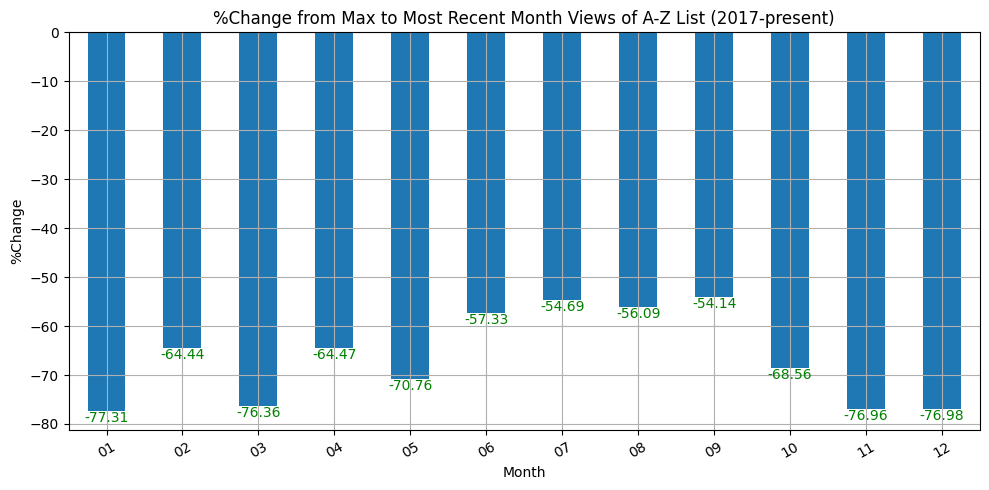

In [55]:
ax12_1 = year_df.plot(
        y="Max_to_Last_%Change", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Month", 
        ylabel="%Change",
        title=f"%Change from Max to Most Recent Month Views of A-Z List (2017-present)"        
)

ax12_1.bar_label(ax12_1.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/a_z_max_to_most_recent.png")

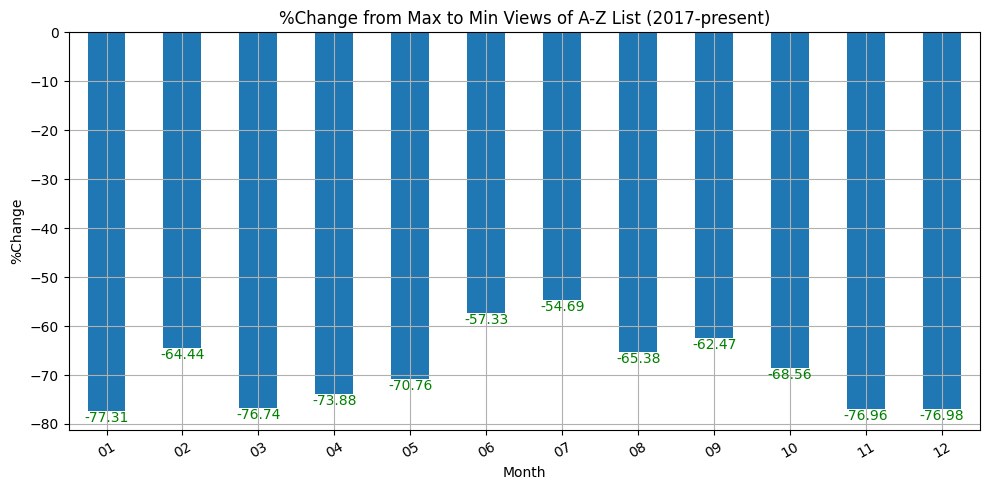

In [56]:
ax12_2 = year_df.plot(
        y="Max_to_Min_%Change", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Month", 
        ylabel="%Change",
        title=f"%Change from Max to Min Views of A-Z List (2017-present)"        
)

ax12_2.bar_label(ax12_2.containers[0], color="green")
plt.tight_layout()

plt.savefig("AtoZ/a_z_max_to_min.png")

In [57]:
print(f'Mean of AtoZ Page Views: {az_df_alltime["Views"].mean()}') 
print(f'Median of AtoZ Page Views: {az_df_alltime["Views"].median()}') 
print(f'Mode of AtoZ Page Views: {st.mode(az_df_alltime["Views"], axis=None, keepdims=False)}') 

print(f'Min of AtoZ Page Views: {az_df_alltime["Views"].min()}') 
print(f'Max of AtoZ Page Views: {az_df_alltime["Views"].max()}') 

Mean of AtoZ Page Views: 1739.774647887324
Median of AtoZ Page Views: 1450.0
Mode of AtoZ Page Views: ModeResult(mode=3209, count=2)
Min of AtoZ Page Views: 387
Max of AtoZ Page Views: 4221
